# Analisando as notas em geral

In [ ]:
import pandas as pd

notas = pd.read_csv("ratings.csv")
notas.head()

In [ ]:
notas.shape

(43084, 4)

In [ ]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

In [ ]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
notas['nota'].value_counts()

In [ ]:
print("Media",notas['nota'].mean())
print("Mediana",notas['nota'].median())

Media 3.5669506081143814
Mediana 4.0


In [ ]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

In [ ]:
notas.nota.plot(kind='hist')

In [ ]:
notas.nota.describe()

count    43084.000000
mean         3.566951
std          1.022535
min          0.500000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: nota, dtype: float64

In [ ]:
import seaborn as sns

sns.boxplot(notas.nota)

# Olhando os filmes

In [ ]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

In [ ]:
notas.head()

# Analisando algumas notas especificas por filme

In [ ]:
notas.query("filmeId==1").nota.mean()

3.897196261682243

In [ ]:
notas.query("filmeId==2").nota.mean()

3.3666666666666667

In [ ]:
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()

filmeId
1    3.897196
2    3.366667
3    3.538462
4    2.600000
5    3.480000
Name: nota, dtype: float64

In [ ]:
medias_por_filme.plot(kind='hist')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

In [ ]:
medias_por_filme.describe()

count    6433.000000
mean        3.436251
std         0.853154
min         0.500000
25%         3.000000
50%         3.500000
75%         4.000000
max         5.000000
Name: nota, dtype: float64

In [ ]:
sns.distplot(medias_por_filme)

In [ ]:
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

In [ ]:
#tmdb = pd.read_csv("tmdb_5000_movies.csv")
#tmdb.head()

In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/aula3/aula3.1/tmdb_5000_movies.csv'
tmdb = pd.read_csv(url)
tmdb.head()

In [ ]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


In [ ]:
sns.barplot(x="original_language", y="total", data = contagem_de_lingua)

In [ ]:
sns.catplot(x="original_language", kind="count", data=tmdb)

In [ ]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

In [ ]:
total_por_lingua = tmdb["original_language"].value_counts()
total_por_lingua.loc["en"]

4505

In [ ]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [ ]:
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]

}

pd.DataFrame(dados)
sns.barplot(data = dados, x = 'lingua', y = 'total')

In [ ]:
plt.pie(dados["total"], labels = dados["lingua"])

In [ ]:
tmdb.query("original_language == 'en'")

In [ ]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

In [ ]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

In [ ]:
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, kind="count")

In [ ]:
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, kind="count", aspect=2)

<ipython-input-71-ead875d2056c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles,


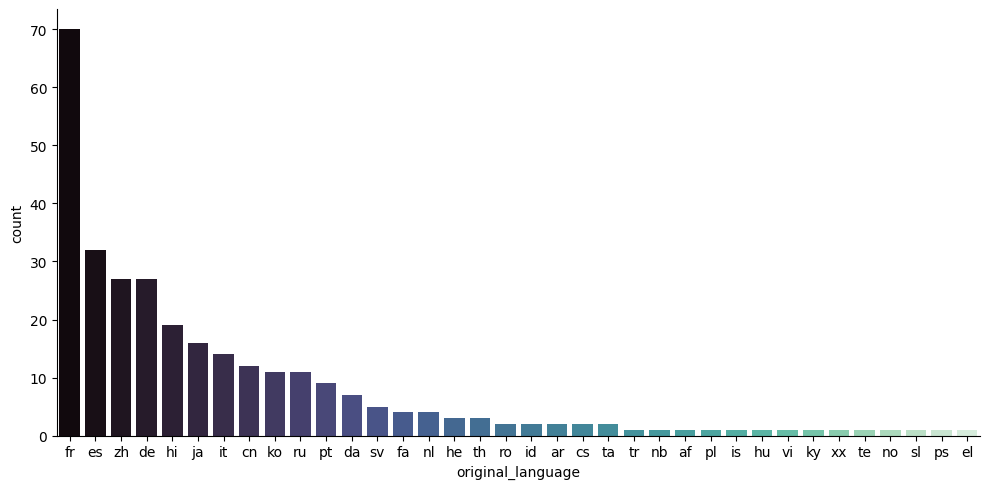

In [ ]:
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles,
            kind="count",
            aspect=2,
            palette="mako",
            order = total_por_lingua_de_outros_filmes.index)


# Revisando o papel da média, mediana, medidas de tendência central, dispersão, desvio padrão, box plot, histograma

In [ ]:
#Extra
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filmes = pd.read_csv("/content/drive/MyDrive/dados/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
notas = pd.read_csv("/content/drive/MyDrive/dados/ratings.csv")
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [ ]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [ ]:
print("Mediana do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Mediana do Jumanji %.2f" % notas_do_jumanji.nota.median())

Mediana do Toy Story 4.00
Mediana do Jumanji 3.50


In [ ]:
import numpy as np

filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))

filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [ ]:
print(filme1.mean(), filme2.mean())

3.0 3.0


In [ ]:
print(np.median(filme1), np.median(filme2))

3.0 3.0


In [ ]:
plt.hist(filme1)
plt.hist(filme2)

<ipython-input-29-2913b8838488>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filme1)
<ipython-input-29-2913b8838488>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filme2)


<Axes: ylabel='Density'>

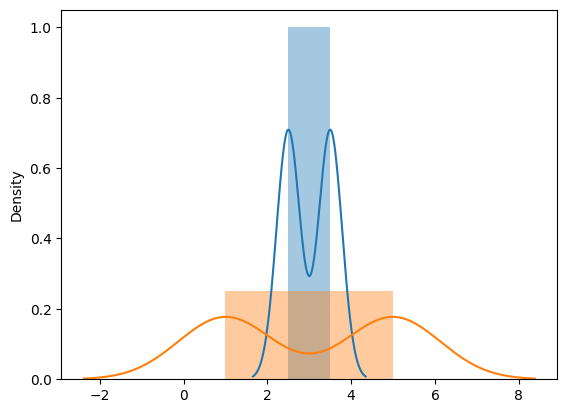

In [ ]:
import seaborn as sns
sns.distplot(filme1)
sns.distplot(filme2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

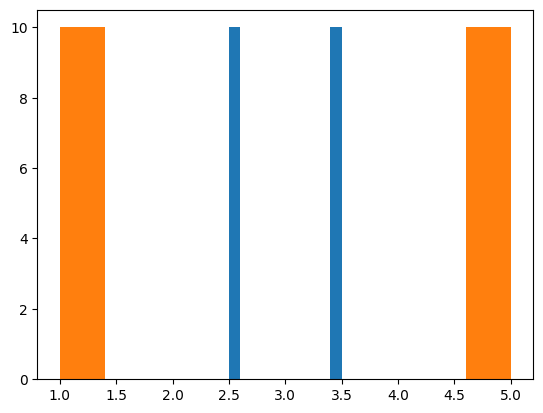

In [ ]:
import matplotlib.pyplot as plt
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f66d86a9810>,
 'caps': [<matplotlib.lines.Line2D at 0x7f66d86a9d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f66d86a9570>,
 'medians': [<matplotlib.lines.Line2D at 0x7f66d86aa290>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f66d86aa530>,
 'means': []}

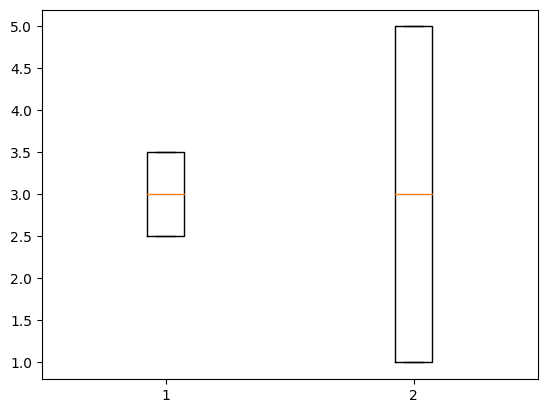

In [ ]:
plt.boxplot([filme1,filme2])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f66d852b4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f66d852ba00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f66d852b220>,
 'medians': [<matplotlib.lines.Line2D at 0x7f66d852bf40>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f66d8558220>,
 'means': []}

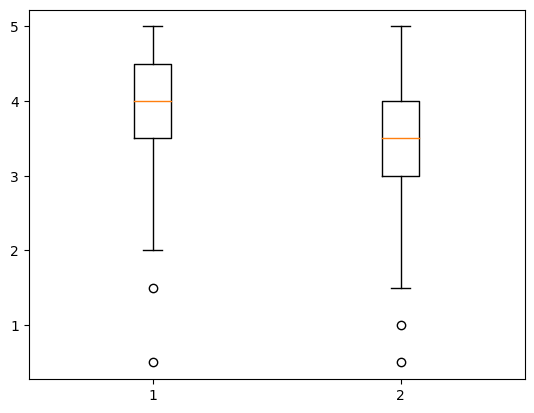

In [ ]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

<Axes: xlabel='filmeId', ylabel='nota'>

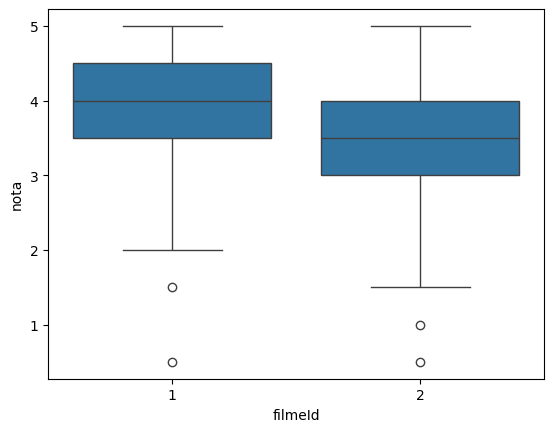

In [ ]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in (1,2)"))

<Axes: xlabel='filmeId', ylabel='nota'>

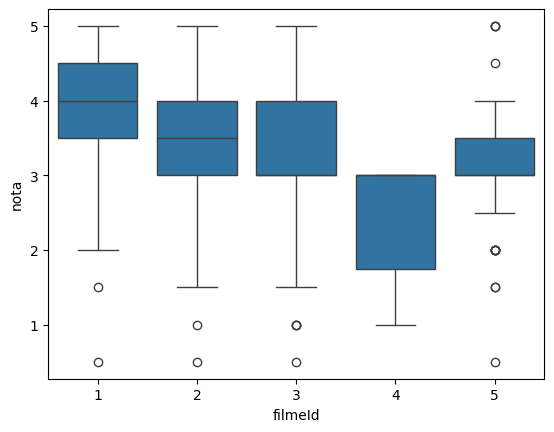

In [ ]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in (1,2,3,4,5)"))

In [ ]:
print("Desvio padrão do Jumanji %.2f" % notas_do_jumanji.nota.std(), "Desvio padrão do Toy Story %.2f" % notas_do_toy_story.nota.std())

Desvio padrão do Jumanji 0.88 Desvio padrão do Toy Story 0.83


In [ ]:
print(np.mean(filme1), np.mean(filme2))
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0
